### __Lab-4 Assignment__ Polynomial Modeling
### __Foundation of ML__
### __Om Patel__ - 8958837

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

### __🎯 The Goal :__ 
The goal is to build a model that can __best predict the risk of diabetes progression__, given the __body mass index  (BMI)__ feature in the dataset. This will be used as a screening tool to help physicians with identifying patients at risk.

#### 💾 __About the DataSet__ :

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline. 

__Note:__ that the 10 x variables have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1).

__Data Set Characteristics:__



| **Additional Details** | **Info** |
|------------------------|------------------------|
| **Number of Instances:** | 442                                       |
| **Number of Attributes:** | First 10 columns are numeric predictive values               |
| **Target:**             | Column 11 is a quantitative measure of disease progression one year after baseline |




[Original Source of Data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt)



In [3]:
odf = datasets.load_diabetes(as_frame=True)
df = pd.DataFrame(odf.data, columns =odf.feature_names)
df['target'] = odf.target
df.head()

age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

__Attribute Information:__
- age = age in years
- sex
- bmi = body mass index
- bp = average blood pressure
- s1 tc = total serum cholesterol
- s2 ldl = low-density lipoproteins
- s3 hdl = high-density lipoproteins
- s4 tch = total cholesterol / HDL
- s5 ltg = possibly log of serum triglycerides level
- s6 glu = blood sugar level


### 📚 __Data Analysis :__

In [4]:
df.describe()

age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

As the Data is normalized we can not find any meaningful insitess from the `pd.describe()` method. However, we can use Visualization to better understand the Data.

In [5]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

There is Zero null values in this dataset. So, we do not need to clean the data also the data is normalized so the values are bit different then general data observation.

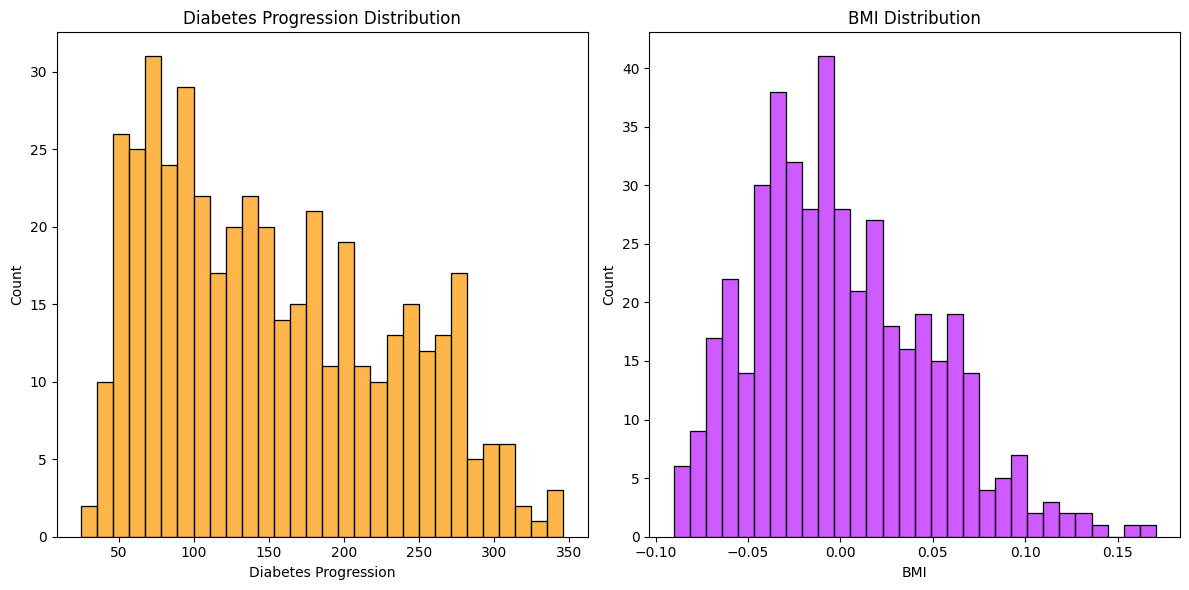

In [6]:
# visualization
# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['target'], bins=30, color='#FE9C0D', edgecolor='black')
plt.title('Diabetes Progression Distribution')
plt.xlabel('Diabetes Progression')
plt.ylabel('Count')
    
plt.subplot(1, 2, 2)
sns.histplot(df['bmi'], bins=30, color='#C023FF', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In the context of the above plots, the distribution of Diabetes Progression indicates the number of patients with similar levels of diabetes progression, as represented by the height of the bars in the histogram. For example, the histogram shows that there are several patients with a Diabetes Progression value between 0 and 30, and fewer patients with values between 310 and 320.

_The graph shows that the data is left skewed._

<Axes: xlabel='bmi', ylabel='target'>

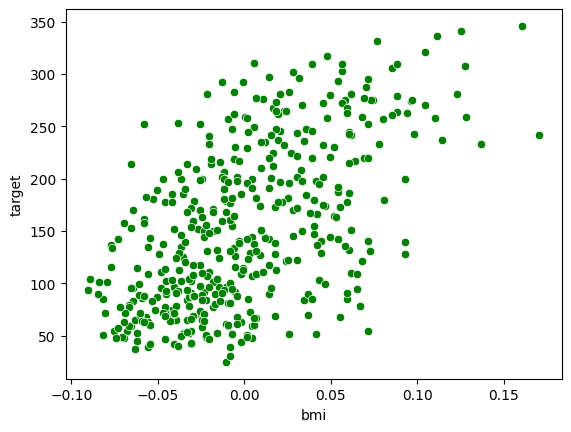

In [7]:
sns.scatterplot(df, x="bmi", y="target", color="g")

According to the Scatter plot, we can say that there is some what correlation between `bmi (Body Mass Index)` and `target (Measure of Disease Progression)`. Because, as the ___bmi___ increases ___target___ value also tend to grow.

Text(0.5, 1.0, 'Correlation Matrix')

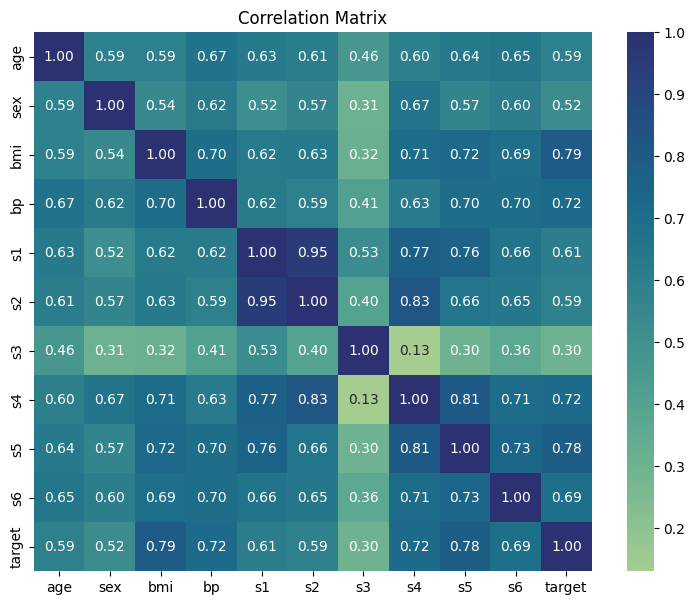

In [8]:
# corelation matrix
plt.figure(figsize=(9,7))
sns.heatmap((df.corr()+1)/2, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix")


This correlation matrix shows that there is very little correlation among `s4` and `s3` whereas `s2` and `s1` are highly correlated with the 95% of correlation. Both fatures are called ___total serum cholesterol__
and ___low-density lipoproteins___.

#### 🛠 __Data Splitting:__ 🪓

In [9]:
X, y = df["bmi"], df["target"]
print(X.head())
print(y.head())

0    0.061696
1   -0.051474
2    0.044451
3   -0.011595
4   -0.036385
Name: bmi, dtype: float64
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [10]:
# splitting the data into TRAIN and TEST sections.
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.7, test_size=0.3, random_state=10)
# splitting the TEST data into VALIDATION and VTEST sections.
X_validation, X_vtest, y_validation, y_vtest = train_test_split(X_test, y_test, test_size=0.5, random_state=11)

#### __🎁 Model Training, Testing and Evaluation:__

Next, we develope in total 6 model of 6 diferent degrees from 0 to 5 and find the evaluation matrices like `r2_score`, `mean_absolute_percentage_error`, and `mean_absolute_error`. So, intotal we have 6 values per model because the degree of Polinomial is 0 to 5.



___Model Evaluation on Train and Validation set:___

In [32]:
train_r2_scores = []
train_mape_scores = []
train_mae_scores = []
val_r2_scores = []
val_mape_scores = []
val_mae_scores = []

for i in range(0,6):
    
    # Polynomial features
    modelP = PolynomialFeatures(degree=i)
    X_train_poly = modelP.fit_transform(np.array(X_train).reshape(-1, 1))
    X_validation_poly = modelP.transform(np.array(X_validation).reshape(-1, 1))
    
    # Polynomial regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions on train and validation set
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_validation_poly)

    # Evaluate on train and validation set
    train_r2_scores.append(r2_score(y_train, y_train_pred))
    train_mape_scores.append(mean_absolute_percentage_error(y_train, y_train_pred))
    train_mae_scores.append(mean_absolute_error(y_train, y_train_pred))
    val_r2_scores.append(r2_score(X_validation, y_val_pred))
    val_mape_scores.append(mean_absolute_percentage_error(X_validation, y_val_pred))
    val_mae_scores.append(mean_absolute_error(X_validation, y_val_pred))

result_df = pd.DataFrame({
    'Degree': [0,1,2,3,4,5],
    'Train R-squared': train_r2_scores,
    'Train MAPE': train_mape_scores,
    'Train MAE': train_mae_scores,
    'Validation R-squared': val_r2_scores,
    'Validation MAPE': val_mape_scores,
    'Validation MAE': val_mae_scores
})

In [35]:
print(result_df)

   Degree  Train R-squared  Train MAPE  Train MAE  Validation R-squared   
0       0         0.000000    0.596034  64.455902         -9.883490e+06  \
1       1         0.341293    0.461841  51.463194         -1.099811e+07   
2       2         0.341365    0.461861  51.464315         -1.100363e+07   
3       3         0.342093    0.460487  51.306148         -1.102793e+07   
4       4         0.342216    0.460998  51.321224         -1.105129e+07   
5       5         0.347684    0.457041  50.907251         -1.122020e+07   

   Validation MAPE  Validation MAE  
0     11014.182539      152.735595  
1     10854.649090      154.298457  
2     10831.131922      154.333300  
3     10772.640546      154.432321  
4     10759.224336      154.534995  
5     10950.167686      155.090175  


___Model Evaluation on Test Set & Plotting:___

Now, lets evaluate the performance of the modes on test data `_(15% of the Dataset)_` and identify the accuracy of each model. After that, we can plot the results.

Chosen Model Degree is 0 and Test R-squared score: -0.0, Test MAE: 65.91, Test MAPE: 0.6


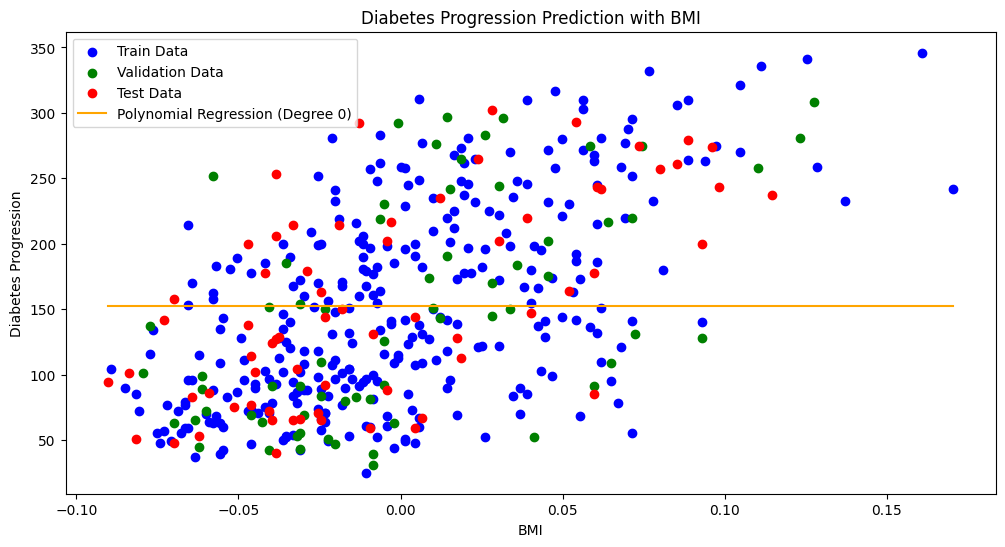

Chosen Model Degree is 1 and Test R-squared score: 0.39, Test MAE: 48.96, Test MAPE: 0.42


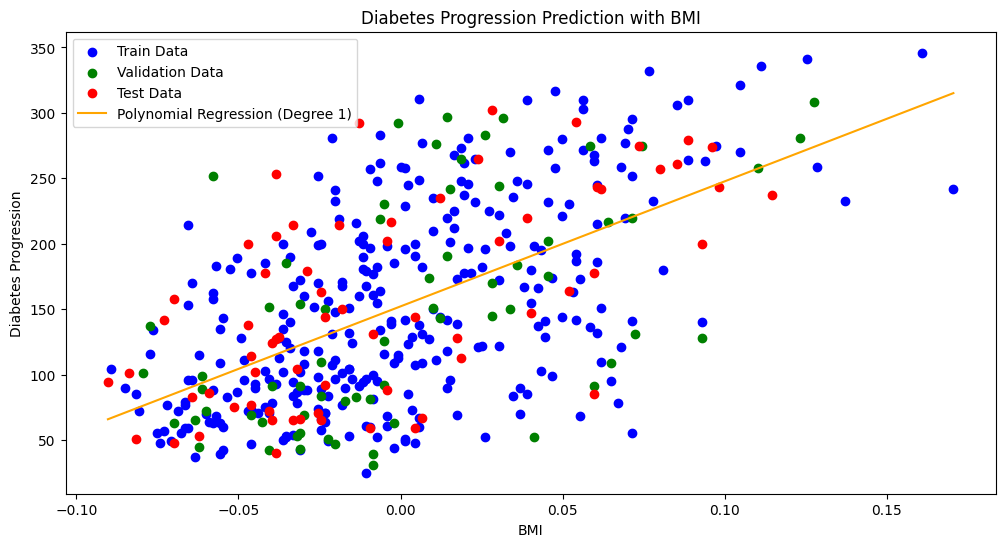

Chosen Model Degree is 2 and Test R-squared score: 0.39, Test MAE: 48.95, Test MAPE: 0.42


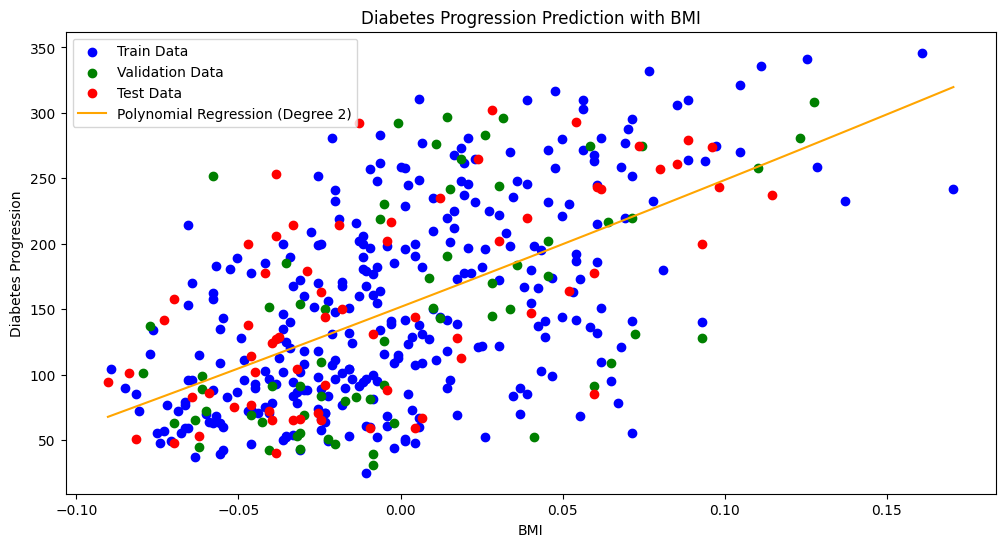

Chosen Model Degree is 3 and Test R-squared score: 0.39, Test MAE: 48.71, Test MAPE: 0.42


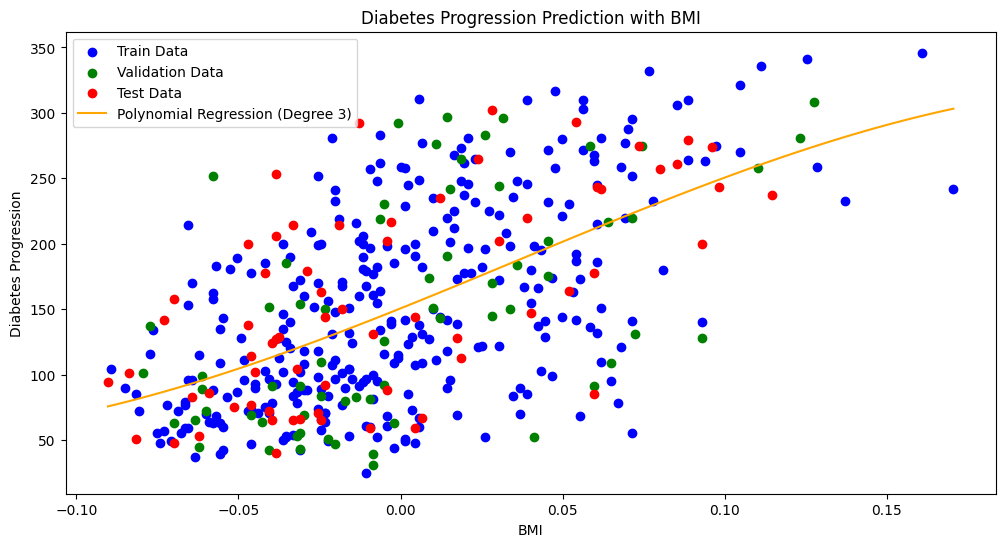

Chosen Model Degree is 4 and Test R-squared score: 0.39, Test MAE: 48.77, Test MAPE: 0.42


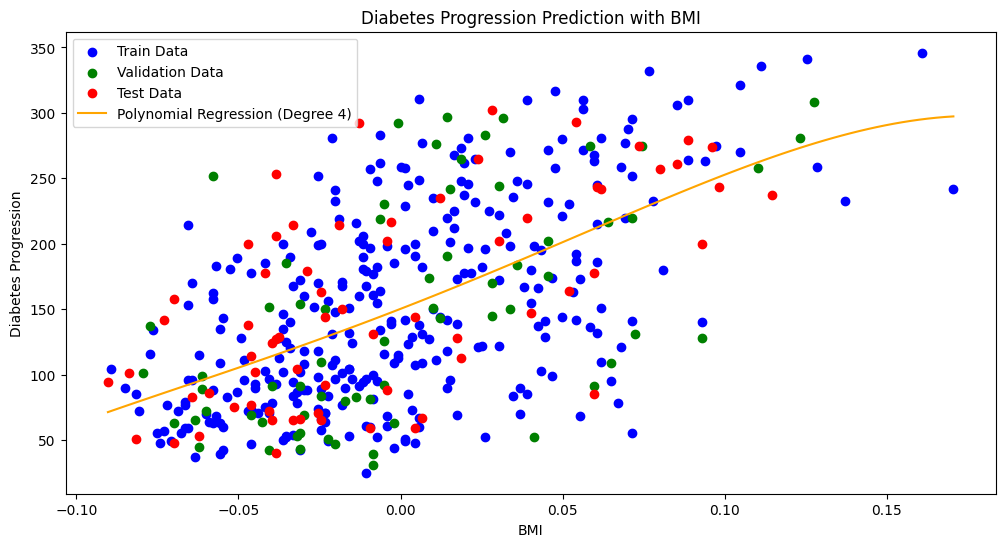

Chosen Model Degree is 5 and Test R-squared score: 0.38, Test MAE: 48.97, Test MAPE: 0.41


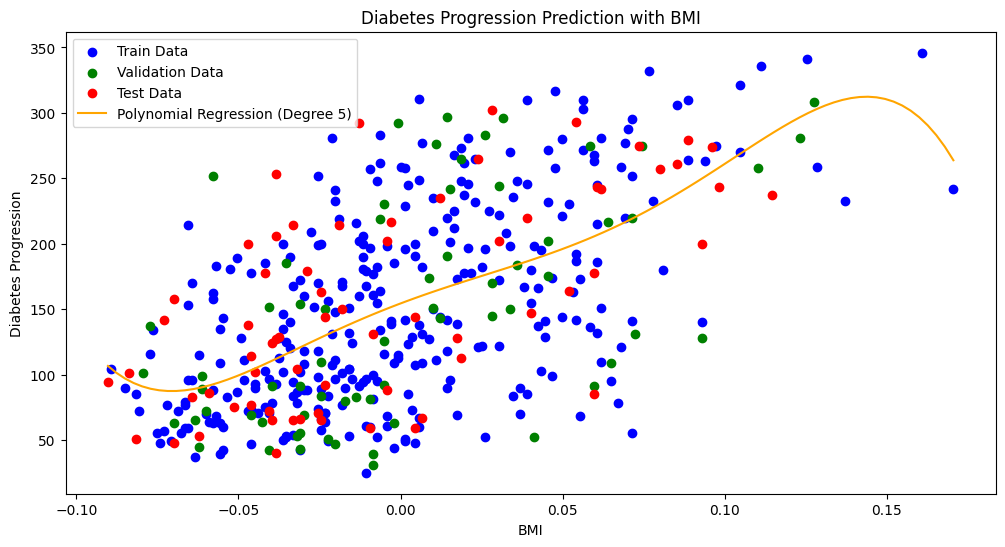

In [58]:
for j in result_df["Degree"]:

    # Chosen model (example, update based on your choice)
    chosen_degree = j
    chosen_model = LinearRegression()

    # Polynomial features
    poly = PolynomialFeatures(degree=chosen_degree)     # Generate a new feature matrix consisting of all polynomial combinations
                                                        # of the features with degree less than or equal to the specified degree.
    # source - Sklearn Documentation    -------->       # For example, if an input sample is two dimensional and of the form
                                                        # [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
    X_train_poly = poly.fit_transform(np.array(X_train).reshape(-1, 1))
    X_test_poly = poly.transform(np.array(X_vtest).reshape(-1, 1))

    # Polynomial regression
    chosen_model.fit(X_train_poly, y_train)

    # Predictions on test set
    y_test_pred = chosen_model.predict(X_test_poly)

    # Evaluate on test set
    test_r2 = r2_score(y_vtest, y_test_pred)
    test_mae = mean_absolute_error(y_vtest, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_vtest, y_test_pred)

    # Display results
    print(f"Chosen Model Degree is {chosen_degree} and Test R-squared score: {round(test_r2,2)}, Test MAE: {round(test_mae,2)}, Test MAPE: {round(test_mape,2)}")


    # plotting data nad line
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train, y_train, color='blue', label='Train Data')
    plt.scatter(X_validation, y_validation, color='green', label='Validation Data')
    plt.scatter(X_vtest, y_vtest, color='red', label='Test Data')

    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range_pred = chosen_model.predict(x_range_poly)

    plt.plot(x_range, y_range_pred, color='orange', label=f'Polynomial Regression (Degree {chosen_degree})')

    plt.title('Diabetes Progression Prediction with BMI')
    plt.xlabel('BMI')
    plt.ylabel('Diabetes Progression')
    plt.legend()
    plt.show()

#### 📊 __Plotting Datapoints and Model's Fit:__

Lets make this graph more interactive with Plotly and LLM model.

In [59]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
plotly.offline.init_notebook_mode()

# Train Data Scatter Plot
train_data = px.scatter(x=X_train, y=y_train, labels={'x': 'BMI', 'y': 'Diabetes Progression'},
                        title='Diabetes Progression Prediction with BMI - Train Data',
                        template='plotly', color_discrete_sequence=['blue'])
train_data.update_traces(mode='markers', marker=dict(size=8), name='Train Data')

# Validation Data Scatter Plot
validation_data = px.scatter(x=X_validation, y=y_validation, labels={'x': 'BMI', 'y': 'Diabetes Progression'},
                             title='Diabetes Progression Prediction with BMI - Validation Data',
                             template='plotly', color_discrete_sequence=['green'])
validation_data.update_traces(mode='markers', marker=dict(size=8), name='Validation Data')

# Test Data Scatter Plot
test_data = px.scatter(x=X_vtest, y=y_vtest, labels={'x': 'BMI', 'y': 'Diabetes Progression'},
                       title='Diabetes Progression Prediction with BMI - Test Data',
                       template='plotly', color_discrete_sequence=['red'])
test_data.update_traces(mode='markers', marker=dict(size=8), name='Test Data')

# Model Fit Line Plot
model_fit = go.Scatter(x=x_range.flatten(), y=y_range_pred.flatten(), mode='lines',
                       name=f'Polynomial Regression (Degree {chosen_degree})', line=dict(color='orange', dash='solid'))

# Combine plots
fig = go.Figure(data=[train_data.data[0], validation_data.data[0], test_data.data[0], model_fit])

# Set layout
fig.update_layout(title='Diabetes Progression Prediction with BMI',
                  xaxis_title='BMI',
                  yaxis_title='Diabetes Progression',
                  legend=dict(x=0.75, y=0.95),
                  template='plotly')

# Show the plot
fig.show()


#### ✍🏼 __Manual Calculation :__

Now, we write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient). Manually calculate the expected diabetes progression for a BMI value of your choice, and compare it to prediction for that value .

In [57]:
coefficients = chosen_model.coef_

equation = f"Diabetes Progression = {round(coefficients[1],2)} * BMI + {round(coefficients[0],2)}"
print(equation)

bmi_value = 27
diabetes_progression_manual = coefficients[1] * bmi_value + coefficients[0]
print(f"Diabetes Progression when BMI is {bmi_value} := {round(diabetes_progression_manual,2)}")

bmi_value_poly = poly.transform([[bmi_value]])
diabetes_progression_model = chosen_model.predict(bmi_value_poly)
print(f"Model Prediction when BMI is {bmi_value} = {diabetes_progression_model[0]}")


Diabetes Progression = 935.7 * BMI + 0.0
Diabetes Progression when BMI is 27 := 25263.84
Model Prediction when BMI is 27 = -82684718299998.06


#### 👨🏼‍💻 __Trainable Parameters:__

In [61]:
print(poly.get_feature_names_out())
print(len(poly.get_feature_names_out()))

['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5']
6


Meaning that we have intotal 6 trainable perameters which we have used in modeling those 5 models.

### ___Conclussion :___ 

According to my observation, I say that model with the __Degree of 4__ is much more accurate then any other Polynomial model. To conclude, we can say that if we apply polynomiality of degree 4 then the model gives the best output or pridction.